# Arrays


# Array Storage

- `Vector` storage

   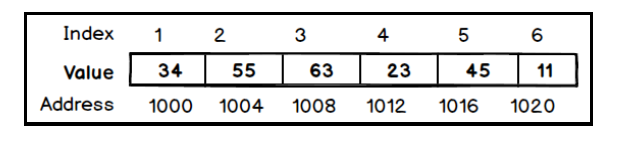
   
   (note: array elements are stored in-line, not references.)
   
- `Matrix` column-major storage (like that in `Fortran` and `MatLab`)

   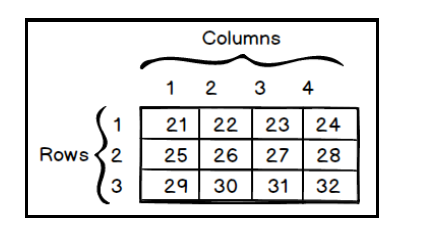
   
   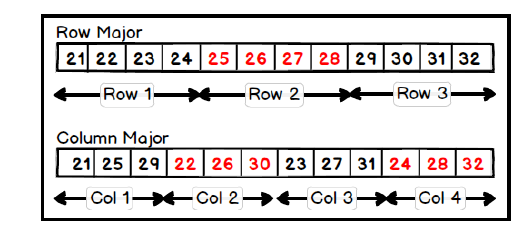

  
- `Array`  

   This storage rule generalizes to the higher-dimensional array as well; it is always the last dimension that is stored first.

In [ ]:
m = [[ 1 2 3];[4 5 6]]

In [ ]:
m[1], m[1,1]

In [ ]:
m[3], m[1,2]

In [ ]:
for i in 1:6
    println(m[i])
end

## Consequences of Matrix colum-major storage

- Access speed

- Image data storag

In [ ]:
m[1:2], m[1:2, 1]

In [ ]:
"""
    Note: for matrix M indexing, we like to use:
          row for row index
          col for column index

    Therefore, M[row, col] is row-th row and col-th column element
"""

function col_iter(x)
    s = zero(eltype(x))
    for col in 1:size(x, 2), row in 1:size(x, 1)
        s = s + x[row, col] ^ 2
        x[row, col] = s
    end
end

In [ ]:
"""
    Note: for matrix M indexing, we like to use:
          row for row index
          col for column index

    Therefore, M[row, col] is row-th row and col-th column element
"""

function row_iter(x)
    s = zero(eltype(x))
    for row in 1:size(x, 1), col in 1:size(x, 2)
        s = s + x[row, col] ^ 2
        x[row, col] = s
    end
end

In [ ]:
a = rand(6_000, 6_000); # requires more than 2GB space

In [ ]:
@time col_iter(a)  

In [ ]:
@time row_iter(a) 

## Adjoints operator `'`

Adjoint in julia is a lazy adjoint -- often, we can easily perform Linear Algebra operations such as A*A' without actually transposing the matrix.

Sometimes, you may have an algorithm that is naturally expressed as row-first. Converting
the algorithm to column-first iteration can be a difficult process, prone to errors. In such
cases, Julia provides an Adjoint type that can store a transpose of a matrix as a **view** into
the original matrix. Row-wise iteration will be the fast option. We illustrate this in the
following code.

In [ ]:
b=a';

In [ ]:
@time col_iter(b)

In [ ]:
@time row_iter(b)

### Method 1: a  vector of 3 `Matrix{Int64}(2,3)`

In [ ]:
v = Vector{Matrix{Int64}}([])
push!(v, [[1 2]; [1 2]; [1 2]])   # use';' to seperate rows
push!(v, [[3 4]; [3 4]; [3 4]])
push!(v, [[5 6]; [5 6]; [5 6]])

In [ ]:
typeof(v), size(v), length(v), sizeof(v)

In [ ]:
for i in 1:3, j in 1:6
    println(v[i][j])
end

In [ ]:
dump(v)

### Method 2 - `Array(3, 2, 3)` last dim is the number of matrices

In [ ]:
a2 = Array{Int64}(undef, (3, 2, 3));

In [ ]:
typeof(a2), size(a2)

In [ ]:
a2[:,:,1] = [[1 2]; [1 2]; [1 2]]
a2[:,:,2] = [[3 4]; [3 4]; [3 4]]
a2[:,:,3] = [[5 6]; [5 6]; [5 6]];

In [ ]:
typeof(a2), size(a2), length(a2), sizeof(a2)

In [ ]:
typeof(a2), size(a2), length(a2), sizeof(a2)

In [ ]:
for i in 1:18
    println(a2[i])
end

In [ ]:
dump(a2)

### Method 3 - `Array(3, 3, 2)` first dim is the number of matrices

In [ ]:
a3 = Array{Int64}(undef, (3, 3, 2));

In [ ]:
a3[1,:,:] = [[1 2]; [1 2]; [1 2]]
a3[2,:,:] = [[3 4]; [3 4]; [3 4]]
a3[3,:,:] = [[5 6]; [5 6]; [5 6]];

In [ ]:
typeof(a3), size(a3), length(a3), sizeof(a3)

In [ ]:
a3[1, :, :]

In [ ]:
for i in 1:18
    println(a3[i])
end

In [ ]:
dump(a3)

## Image data storage

In [ ]:
using Colors

In [ ]:
r = RGB{Float32}(1,0,0)
g = RGB{Float32}(0,1,0)
b = RGB{Float32}(0,0,1)

In [ ]:
x = [r,r,r,g,g,g,b,b,b]

In [ ]:
m = reshape(x, 3, 3)

In [ ]:
typeof(m)

In [ ]:
m'    # Adjoints

In [ ]:
n = m'  

In [ ]:
n[1,1] = RGB{Float32}(1,1,0)

In [ ]:
n

In [ ]:
m

In [ ]:
x2 = hcat(fill(r,8),fill(g,8),fill(b,8))

In [ ]:
m2 = x2'

# Using `reshape` function  
    
`reshape(A, dims...) -> AbstractArray`

`reshape(A, dims) -> AbstractArray`

Return an array with the same data as A, but with different dimension sizes or number of dimensions. The two arrays share the same underlying data, so that the result is mutable if and only if A is mutable, and setting elements of one alters the values of the other.

The new dimensions may be specified either as a list of arguments or as a shape tuple. At most one dimension may be specified with a :, in which case its length is computed such that its product with all the specified dimensions is equal to the length of the original array A. The total number of elements must not change.

### Examples

In [ ]:
A = reshape(1:16, (4, 4))

In [ ]:
A = Matrix{Int64}(A)

In [ ]:
reshape(A, 2, :)

In [ ]:
reshape(A, 4, :)

# Array initialization

Creating a new array is a two-step process. 

1. First, memory for the array needs to be allocated. The size of the memory is a product of the length of the array and the size of each element of the array . 
2. Second, the allocated memory needs to be filled with initial values. 

The simplest way to create arrays in Julia is by using the `fill` function, which does both these operations in one function, as shown in the following code:

In [ ]:
@time fill(1, 10_000, 10_000);

In [ ]:
@time fill(undef, 10_000, 10_000);

In [ ]:
@time begin
    m = Matrix{Int}(undef, 10_000, 10_000);
    fill!(m, 1);
end

# Bounds checking

The Julia runtime performs bounds checks on arrays by default. 

This means that the Julia compiler and runtime verify that the arrays are not
indexed outside their limits and that all the indexes lie between the actual start and end of
an array.

The `@inbounds` macro can be applied in front of a function or loop definition. Once this is
done, all bound checking is disabled within the code block annotated with this macro.